In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

2026-01-19 20:14:59.538532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768853699.815057      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768853699.890013      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768853700.602124      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768853700.602182      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768853700.602186      55 computation_placer.cc:177] computation placer alr

In [4]:
print(tf.__version__)

2.19.0


In [7]:
print(keras.__version__)

3.10.0


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumn2u/garbage-classification-v2")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/garbage-classification-v2


### Spliiting the dataset into test, train and validation

In [4]:
def split_dataset(source_dir, target_dir, train_ratio=0.7, val_ratio=0.15):
    import os
    import shutil
    import random

    def split_exists(target_dir):
        required_folders = ["train", "val", "test"]
        for folder in required_folders:
            folder_path = os.path.join(target_dir, folder)
            if not os.path.exists(folder_path):
                return False
            if not any(
                os.listdir(os.path.join(folder_path, cls))
                for cls in os.listdir(folder_path)
                if os.path.isdir(os.path.join(folder_path, cls))
            ):
                return False
        return True

    if split_exists(target_dir):
        print(f"Split already exists at {target_dir} — skipping.")
        return

    print(f"Splitting dataset from {source_dir} → {target_dir}")

    classes = [d for d in os.listdir(source_dir)
               if os.path.isdir(os.path.join(source_dir, d))]

    for cls in classes:
        print(f"Processing class: {cls}")
        class_source = os.path.join(source_dir, cls)
        images = os.listdir(class_source)
        random.shuffle(images)

        n = len(images)
        train_end = int(n * train_ratio)
        val_end = train_end + int(n * val_ratio)

        train_imgs = images[:train_end]
        val_imgs = images[train_end:val_end]
        test_imgs = images[val_end:]

        for split in ["train", "val", "test"]:
            os.makedirs(os.path.join(target_dir, split, cls), exist_ok=True)

        for img in train_imgs:
            shutil.copy(
                os.path.join(class_source, img),
                os.path.join(target_dir, "train", cls)
            )
        for img in val_imgs:
            shutil.copy(
                os.path.join(class_source, img),
                os.path.join(target_dir, "val", cls)
            )
        for img in test_imgs:
            shutil.copy(
                os.path.join(class_source, img),
                os.path.join(target_dir, "test", cls)
            )

    print("Split complete!")


In [5]:
source_dir = path,
target_dir = "./garbage-dataset-split"


split_dataset(
    source_dir = path,
    target_dir = "./garbage-dataset-split"
)


Splitting dataset from /kaggle/input/garbage-classification-v2 → ./garbage-dataset-split
Processing class: metal
Processing class: glass
Processing class: biological
Processing class: paper
Processing class: battery
Processing class: trash
Processing class: cardboard
Processing class: shoes
Processing class: clothes
Processing class: plastic
Split complete!


In [6]:
import os
print(os.listdir(f'{path}'))

['metal', 'glass', 'biological', 'paper', 'battery', 'trash', 'cardboard', 'shoes', 'clothes', 'plastic']


In [7]:
from tensorflow.keras.preprocessing.image import load_img

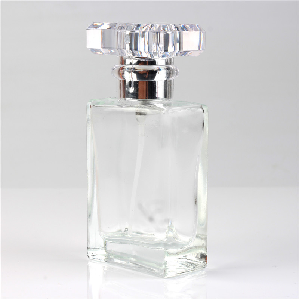

In [8]:
sample_image = os.path.join(
    target_dir,
    'train',
    'glass',
    os.listdir(f"{target_dir}/train/glass")[0]  # first file in the folder
)

img = load_img(sample_image, target_size=(299, 299))
img


In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1768812333.439842      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768812333.443680      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
X = np.array([x])
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

I0000 00:00:1768812337.232966     126 service.cc:152] XLA service 0x7c4038003de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768812337.233001     126 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768812337.233005     126 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768812337.784761     126 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-01-19 08:45:42.607236: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:45:42.750604: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:45:43.404779: E external/local_xl

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03983396', 'pop_bottle', np.float32(0.7677314)),
  ('n04557648', 'water_bottle', np.float32(0.089029185)),
  ('n02823428', 'beer_bottle', np.float32(0.024004767)),
  ('n03916031', 'perfume', np.float32(0.00890897)),
  ('n04591713', 'wine_bottle', np.float32(0.007972989))]]

### Transfer Learning

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #creates the generator object

train_ds = train_gen.flow_from_directory('./garbage-dataset-split/train', #reads in the train dataset using the generator object
                              target_size =(150, 150),
                              batch_size =32 #indicates how many images we read at once i.e 32 vectors, 1 for each, with 32 predictions at the end
                              )


Found 14142 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'battery': 0,
 'biological': 1,
 'cardboard': 2,
 'clothes': 3,
 'glass': 4,
 'metal': 5,
 'paper': 6,
 'plastic': 7,
 'shoes': 8,
 'trash': 9}

In [19]:
X, y = next(train_ds)   #prints out the next batch of 32 images

In [20]:
X.shape

(32, 150, 150, 3)

In [21]:
y[:5]   #prints out the target variables. it uses one-hot encoding.  column 4 is for "glass" as shown by the class indices above.
        #1 means glass while 0 means not "glass". This works for multi-class

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./garbage-dataset-split/val',
                              target_size =(150, 150),
                              batch_size =32,
                              shuffle=False
                              )

Found 3027 images belonging to 10 classes.


### Creating the model

In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3),
    )

base_model.trainable = False  #this freezes the convolutioanl layers

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Creating a new "top" (Dense layer)

In [13]:

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = keras.layers.Dense(10)(vectors)   #creates dense layer. here, activation is false by default. i.e we keep the raw scores
                                            #instead of getting the predictions

model = keras.Model(inputs, outputs)  #output is what will be produced when we invoke "predict"

NameError: name 'base_model' is not defined

In [25]:
preds = model.predict(X)

2026-01-19 08:46:02.155418: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:02.304789: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:03.417642: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:03.551286: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:04.333660: E external/local_xla/xla/stream_

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


In [26]:
preds.shape

(32, 10)

In [27]:
learning_rate = 0.01

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)  #determines the best weights during training

loss = keras.losses.CategoricalCrossentropy(from_logits=True)     # tells us how goood the model is. CategoricalCrossentropy evaluates multi-class classification models
                                                          #logits is the row output/row score of the dense layer before we apply softmax(activation)

In [28]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [29]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
133/442 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.7266 - loss: 1.0666

2026-01-19 08:46:29.629973: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:29.777418: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:30.792995: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:30.926492: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:46:31.707801: E external/local_xla/xla/stream_

442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7884 - loss: 0.9242

2026-01-19 08:47:14.304558: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:47:14.447542: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:47:15.461233: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:47:15.595724: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 08:47:16.346780: E external/local_xla/xla/stream_

442/442 ━━━━━━━━━━━━━━━━━━━━ 72s 148ms/step - accuracy: 0.7885 - loss: 0.9241 - val_accuracy: 0.8550 - val_loss: 0.8127
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.8906 - loss: 0.5373 - val_accuracy: 0.8728 - val_loss: 0.7572
Epoch 3/10
342/442 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9208 - loss: 0.3406

KeyboardInterrupt: 

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))

plt.legend()

plt.show()

### Tuning Learning Rate

In [ ]:
def make_model(learning_rate):
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(150, 150, 3),
      )

  base_model.trainable = False

######################################################
  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs, training=False)

  pooling = keras.layers.GlobalAveragePooling2D()
  vectors = pooling(base)

  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  ######################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
      )

  return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[lr] = history.history

In [ ]:
for lr, hist in scores.items():
  #plt.plot(hist['accuracy'], label=(f"train= {lr}"))
  plt.plot(hist['val_accuracy'], label=(f"val= {lr}"))

plt.xticks(np.arange(10))
plt.legend()

plt.show()

In [ ]:
del scores[0.0001]

In [ ]:
learning_rate = 0.001

### Checkpointing
- Save the best model only
- Training a model with callbacks

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                save_best_only=True,
                                monitor='val_accuracy',
                                mode='max'
                                )

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)


### Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [ ]:
def make_model(learning_rate, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3),
    )

    base_model.trainable = False

######################################################
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    ######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
        )

    return model

In [ ]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history

In [ ]:
for size, hist in scores.items():
  #plt.plot(hist['accuracy'], label=(f"train= {size}"))
  plt.plot(hist['val_accuracy'], label=(f"val= {size}"))

plt.xticks(np.arange(10))
plt.legend()

plt.show()

### Regularization and Dropout
- Regularizing by freezing a part of the network
- Adding dropout to the model
- Experimenting with different values

In [12]:
def make_model(learning_rate, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3),
    )

    base_model.trainable = False

######################################################
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)        # droprate eindicates how much of the inner layer we freeze

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
        )

    return model

In [ ]:
learning_rate = 0.001
size = 100
scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(learning_rate=learning_rate,
                     size_inner=size,
                     droprate=droprate)
  history = model.fit(train_ds, epochs=30, validation_data=val_ds) # number of epochs is increased because regularization has been added. model needs more time to learn since we are freezing some parts of the layer
  scores[droprate] = history.history

In [ ]:
for droprate, hist in scores.items():
    #plt.plot(hist['accuracy'], label=(f"train= {droprate}"))
    plt.plot(hist['val_accuracy'], label=(f"val= {droprate}"))

plt.xticks(np.arange(10))
plt.legend()

plt.show()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label="train")
plt.plot(hist['val_accuracy'], label="val")

plt.legend()

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label="train")
plt.plot(hist['val_accuracy'], label="val")

plt.legend()

In [ ]:
hist = scores[0.2]
#plt.plot(hist['accuracy'], label=(f"train= {droprate}"))
plt.plot(hist['val_accuracy'], label=(f"val= {0.2}"))

hist = scores[0.5]
#plt.plot(hist['accuracy'], label=(f"train= {droprate}"))
plt.plot(hist['val_accuracy'], label=(f"val= {0.5}"))

plt.legend()

In [ ]:
dropout = 0.5

### Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    #width_shift_range= 0.0,
    #height_shift_range=0.0,
    #shear_range=0.0,
    #zoom_range=0.0,
    #cval=0.0,
    #horizontal_flip=False,
    #vertical_flip=False
)

train_ds = train_gen.flow_from_directory('./garbage-dataset-split/train',
                              target_size =(150, 150),
                              batch_size =32
                              )

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./garbage-dataset-split/val',
                              target_size =(150, 150),
                              batch_size =32,
                              shuffle=False
                              )

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(learning_rate=learning_rate,
                     size_inner=size,
                     droprate=droprate,
)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)
scores[droprate] = history.history

In [14]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range= 0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory('./garbage-dataset-split/train',
                              target_size =(150, 150),
                              batch_size =32
                              )

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./garbage-dataset-split/val',
                              target_size =(150, 150),
                              batch_size =32,
                              shuffle=False
                              )

Found 14142 images belonging to 10 classes.
Found 3027 images belonging to 10 classes.


### Training a larger model

In [13]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3),
    )

    base_model.trainable = False

######################################################
    inputs = keras.Input(shape=(input_size, input_size, 3))

    base = base_model(inputs, training=False)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)        # droprate eindicates how much of the inner layer we freeze

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    ######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
        )

    return model

In [14]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range= 0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory('./garbage-dataset-split/train',
                              target_size =(299, 299),
                              batch_size =32
                              )

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./garbage-dataset-split/val',
                              target_size =(299, 299),
                              batch_size =32,
                              shuffle=False
                              )

Found 14142 images belonging to 10 classes.
Found 3027 images belonging to 10 classes.


In [15]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
                                save_best_only=True,
                                monitor='val_accuracy',
                                mode='max'
                                )

In [17]:
learning_rate = 0.001
size = 100
droprate = 0.5
input_size = 299

model = make_model(
                learning_rate=learning_rate,
                input_size=input_size,
                size_inner=size,
                droprate=droprate,
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                    callbacks=[checkpoint])
scores[droprate] = history.history

Epoch 1/50
328/442 ━━━━━━━━━━━━━━━━━━━━ 1:12 636ms/step - accuracy: 0.7288 - loss: 0.8752

2026-01-19 14:22:53.027558: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv %cudnn-conv.78 = (f32[30,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[30,128,147,147]{3,2,1,0} %bitcast.7570, f32[128,1,3,3]{3,2,1,0} %bitcast.7574), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", metadata={op_type="DepthwiseConv2dNative" op_name="functional_1_1/xception_1/block2_sepconv2_1/separable_conv2d/depthwise" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2026-01-19 14:22:53.036734: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.0092978

442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.7545 - loss: 0.7933

2026-01-19 14:25:20.424567: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 14:25:20.664595: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 14:25:21.418276: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 14:25:21.658540: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 14:25:22.708440: E external/local_xla/xla/stream_

442/442 ━━━━━━━━━━━━━━━━━━━━ 396s 865ms/step - accuracy: 0.7547 - loss: 0.7927 - val_accuracy: 0.9101 - val_loss: 0.2867
Epoch 2/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.8924 - loss: 0.3450

442/442 ━━━━━━━━━━━━━━━━━━━━ 317s 716ms/step - accuracy: 0.8924 - loss: 0.3450 - val_accuracy: 0.9151 - val_loss: 0.2518
Epoch 3/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.9037 - loss: 0.3035

442/442 ━━━━━━━━━━━━━━━━━━━━ 321s 725ms/step - accuracy: 0.9037 - loss: 0.3035 - val_accuracy: 0.9247 - val_loss: 0.2300
Epoch 4/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 315s 713ms/step - accuracy: 0.9149 - loss: 0.2641 - val_accuracy: 0.9243 - val_loss: 0.2229
Epoch 5/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9228 - loss: 0.2387

442/442 ━━━━━━━━━━━━━━━━━━━━ 321s 726ms/step - accuracy: 0.9228 - loss: 0.2387 - val_accuracy: 0.9293 - val_loss: 0.2204
Epoch 6/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 319s 722ms/step - accuracy: 0.9221 - loss: 0.2298 - val_accuracy: 0.9257 - val_loss: 0.2257
Epoch 7/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 310s 702ms/step - accuracy: 0.9238 - loss: 0.2281 - val_accuracy: 0.9283 - val_loss: 0.2206
Epoch 8/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9232 - loss: 0.2144

442/442 ━━━━━━━━━━━━━━━━━━━━ 315s 712ms/step - accuracy: 0.9232 - loss: 0.2144 - val_accuracy: 0.9349 - val_loss: 0.2050
Epoch 9/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.9364 - loss: 0.1922

442/442 ━━━━━━━━━━━━━━━━━━━━ 318s 719ms/step - accuracy: 0.9364 - loss: 0.1922 - val_accuracy: 0.9362 - val_loss: 0.2081
Epoch 10/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 312s 706ms/step - accuracy: 0.9387 - loss: 0.1825 - val_accuracy: 0.9323 - val_loss: 0.2147
Epoch 11/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 321s 726ms/step - accuracy: 0.9386 - loss: 0.1823 - val_accuracy: 0.9343 - val_loss: 0.2135
Epoch 12/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 318s 719ms/step - accuracy: 0.9349 - loss: 0.1857 - val_accuracy: 0.9329 - val_loss: 0.2144
Epoch 13/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 324s 733ms/step - accuracy: 0.9419 - loss: 0.1676 - val_accuracy: 0.9352 - val_loss: 0.2009
Epoch 14/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9469 - loss: 0.1514

442/442 ━━━━━━━━━━━━━━━━━━━━ 314s 710ms/step - accuracy: 0.9469 - loss: 0.1514 - val_accuracy: 0.9366 - val_loss: 0.2042
Epoch 15/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.9415 - loss: 0.1678

442/442 ━━━━━━━━━━━━━━━━━━━━ 317s 716ms/step - accuracy: 0.9415 - loss: 0.1678 - val_accuracy: 0.9382 - val_loss: 0.1970
Epoch 16/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9457 - loss: 0.1517

442/442 ━━━━━━━━━━━━━━━━━━━━ 319s 722ms/step - accuracy: 0.9457 - loss: 0.1517 - val_accuracy: 0.9386 - val_loss: 0.2087
Epoch 17/50
 21/442 ━━━━━━━━━━━━━━━━━━━━ 4:41 668ms/step - accuracy: 0.9495 - loss: 0.1349

KeyboardInterrupt: 

### Loading the model

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

In [20]:
# load test data
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory('./garbage-dataset-split/test',
                              target_size =(299, 299),
                              batch_size =32,
                              shuffle=False
                              )

Found 3043 images belonging to 10 classes.


In [22]:
model = keras.models.load_model('xception_v4_16_0.939.h5')

In [23]:
model.evaluate(test_ds)

95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9587 - loss: 0.1406

2026-01-19 15:47:26.740056: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:47:26.893242: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:47:28.204152: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:47:28.353519: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:47:29.168115: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 447ms/step - accuracy: 0.9583 - loss: 0.1416


[0.19289763271808624, 0.9415050745010376]

In [24]:
path = './garbage-dataset-split/test/paper/202512-paper109.jpg'

In [25]:
img = load_img(path, target_size=(299, 299))

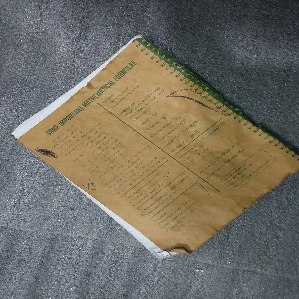

In [26]:
img

In [27]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [28]:
X = preprocess_input(X)

In [29]:
pred = model.predict(X)

2026-01-19 15:48:04.748498: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:48:04.891330: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:48:05.563774: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:48:05.695381: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-19 15:48:06.395626: E external/local_xla/xla/stream_

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


In [30]:
classes = [
    'battery',
    'biological',
    'cardboard',
    'clothes',
    'glass',
    'metal',
    'paper',
    'plastic',
    'shoes',
    'trash'
  ]

In [31]:
dict(zip(classes, pred[0]))

{'battery': np.float32(-4.9056416),
 'biological': np.float32(-9.863589),
 'cardboard': np.float32(-0.1613436),
 'clothes': np.float32(-5.4460683),
 'glass': np.float32(-3.008946),
 'metal': np.float32(-0.14420593),
 'paper': np.float32(6.2975063),
 'plastic': np.float32(-0.57419014),
 'shoes': np.float32(-8.373375),
 'trash': np.float32(-0.90873367)}

In [1]:
model.save('xception_v4_saved_model')

NameError: name 'model' is not defined